In [1]:
#Import libraries
import pandas as pd
import numpy as np

#import libraries and modules for data visualisation
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

#import scikit learn module to split dataset
from sklearn.model_selection import train_test_split

#import scikit learn module for k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#import scikit learn module to encode classes into the one-hot coding matrix
from sklearn.preprocessing import LabelEncoder

#Import Keras modules
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
#fix random seed
random_seed=7
np.random.seed(random_seed)

In [3]:
#Load data
filename='Iris.csv'

#load data into pandas dataframe
df=pd.read_csv(filename)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#prepocess data

#clean the data

#check for missing values or NaN values
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
#EDA

#get the dimensions/shape of the dataset
#rows*columns
print('shape of the dataset: ', df.shape)

#get the attributes of the dataset/ data types of the variables
print('attributes of the dataset:\n', df.dtypes)

shape of the dataset:  (150, 6)
attributes of the dataset:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [6]:
#get the first five records from the dataset
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#summary statistics of of numeric variables
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#class distribution, how many records for each class
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

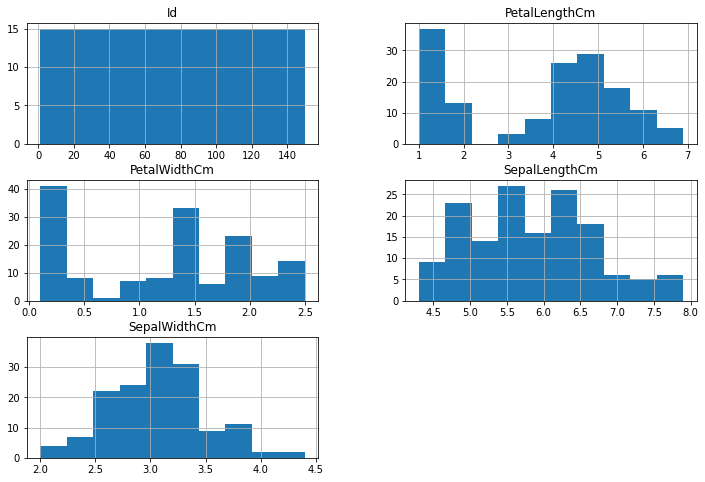

In [9]:
#plot histogram for each numeric variable
df.hist(figsize=(12,8))
pyplot.show()

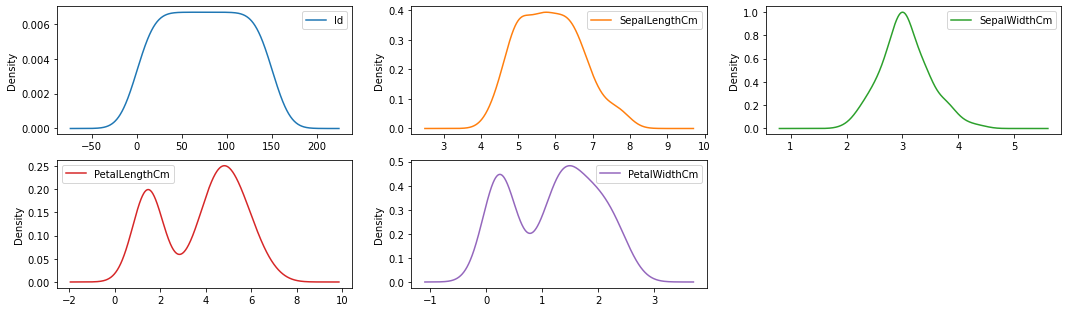

In [10]:
#density plots
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True,figsize=(18,8))
pyplot.show()

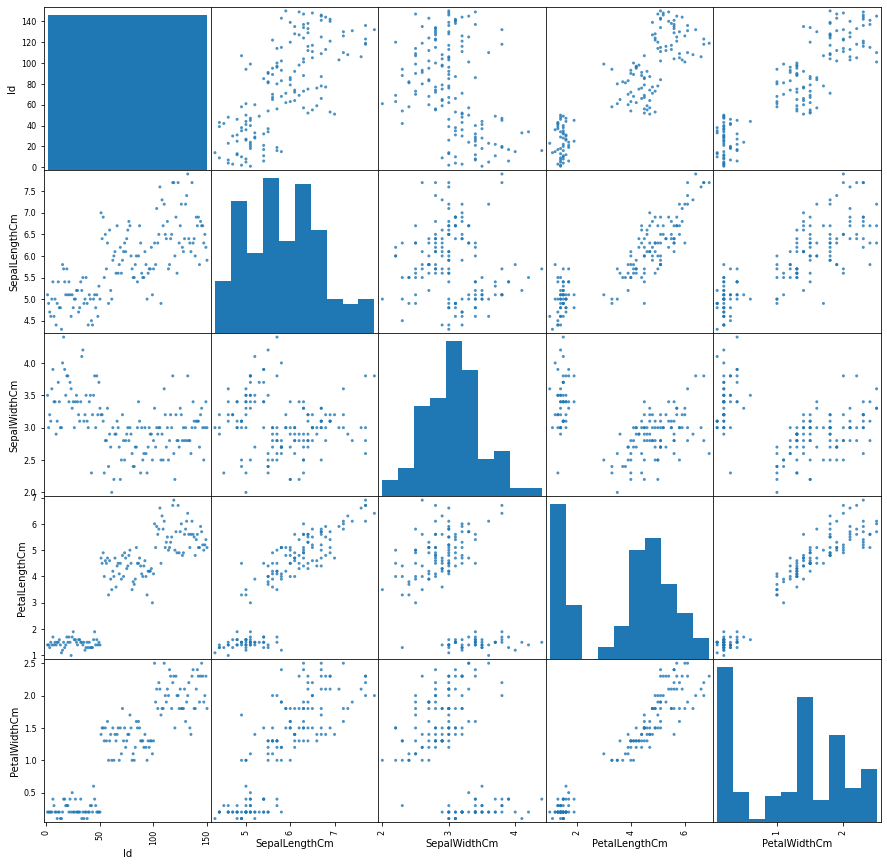

In [11]:
#scatter plot matrix
scatter_matrix(df, alpha=0.8, figsize=(15,15))
pyplot.show()

In [12]:
#separate dataser into input and output arrays
array=df.values
print('Array:\n', array)

#seperate array into input and output components

#all rows, columns from 1 to 8
X=array[:,1:5]
print('Input Array:\n',X)

#all rows, 9th column
y=array[:,5]
print('Output Array:\n',y)

Array:
 [[1 5.1 3.5 1.4 0.2 'Iris-setosa']
 [2 4.9 3.0 1.4 0.2 'Iris-setosa']
 [3 4.7 3.2 1.3 0.2 'Iris-setosa']
 [4 4.6 3.1 1.5 0.2 'Iris-setosa']
 [5 5.0 3.6 1.4 0.2 'Iris-setosa']
 [6 5.4 3.9 1.7 0.4 'Iris-setosa']
 [7 4.6 3.4 1.4 0.3 'Iris-setosa']
 [8 5.0 3.4 1.5 0.2 'Iris-setosa']
 [9 4.4 2.9 1.4 0.2 'Iris-setosa']
 [10 4.9 3.1 1.5 0.1 'Iris-setosa']
 [11 5.4 3.7 1.5 0.2 'Iris-setosa']
 [12 4.8 3.4 1.6 0.2 'Iris-setosa']
 [13 4.8 3.0 1.4 0.1 'Iris-setosa']
 [14 4.3 3.0 1.1 0.1 'Iris-setosa']
 [15 5.8 4.0 1.2 0.2 'Iris-setosa']
 [16 5.7 4.4 1.5 0.4 'Iris-setosa']
 [17 5.4 3.9 1.3 0.4 'Iris-setosa']
 [18 5.1 3.5 1.4 0.3 'Iris-setosa']
 [19 5.7 3.8 1.7 0.3 'Iris-setosa']
 [20 5.1 3.8 1.5 0.3 'Iris-setosa']
 [21 5.4 3.4 1.7 0.2 'Iris-setosa']
 [22 5.1 3.7 1.5 0.4 'Iris-setosa']
 [23 4.6 3.6 1.0 0.2 'Iris-setosa']
 [24 5.1 3.3 1.7 0.5 'Iris-setosa']
 [25 4.8 3.4 1.9 0.2 'Iris-setosa']
 [26 5.0 3.0 1.6 0.2 'Iris-setosa']
 [27 5.0 3.4 1.6 0.4 'Iris-setosa']
 [28 5.2 3.5 1.5 0.2 'Iris-se

In [13]:
#split input and output arrays into training/ testing datasets
test_size=0.33

#random_seed=7
#print(np.random.seed(random_seed))

#split the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_seed)

In [14]:
#encode class values -one hot encoding
encoder_train=LabelEncoder()
encoder_train.fit(y_train)
encoded_y_train=encoder_train.transform(y_train)

#convert integers to one hot coding format
onehot_y_train=np_utils.to_categorical(encoded_y_train)

#encode class values as integers
encoder_test=LabelEncoder()
encoder_test.fit(y_test)
encoded_y_test=encoder_test.transform(y_test)

#convert integers to one hot coding format
onehot_y_test=np_utils.to_categorical(encoded_y_test)

In [15]:
#define a function
def build_model():
    #build the model
    model=Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))  
    
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    

In [16]:
#build the model
model=build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [17]:
#train the model
train=model.fit(X_train, onehot_y_train, epochs=150, batch_size=10)


Epoch 1/150
100/100 [==============================] - 0s 4ms/step - loss: 1.2315 - accuracy: 0.3600
Epoch 2/150
100/100 [==============================] - 0s 173us/step - loss: 1.1951 - accuracy: 0.3600
Epoch 3/150
100/100 [==============================] - 0s 160us/step - loss: 1.1567 - accuracy: 0.3700
Epoch 4/150
100/100 [==============================] - 0s 156us/step - loss: 1.1201 - accuracy: 0.4200
Epoch 5/150
100/100 [==============================] - 0s 169us/step - loss: 1.0821 - accuracy: 0.5900
Epoch 6/150
100/100 [==============================] - 0s 174us/step - loss: 1.0505 - accuracy: 0.6600
Epoch 7/150
100/100 [==============================] - 0s 172us/step - loss: 1.0300 - accuracy: 0.6800
Epoch 8/150
100/100 [==============================] - 0s 170us/step - loss: 1.0149 - accuracy: 0.6800
Epoch 9/150
100/100 [==============================] - 0s 167us/step - loss: 0.9995 - accuracy: 0.6800
Epoch 10/150
100/100 [==============================] - 0s 186us/step - lo

In [18]:
#train the model
trnsc=model.evaluate(X_train, onehot_y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1],trnsc[1]*100))

100/100 [==============================] - 0s 929us/step

accuracy: 96.00%


In [19]:
#evaluate the model
#create keras classifier to evaluate the model
evaluator=KerasClassifier(build_fn=build_model, epochs=200, batch_size=5)
#evaluate the model
kfold=KFold(n_splits=10, shuffle=True, random_state=random_seed)
acc=cross_val_score(evaluator, X_test, onehot_y_test, cv=kfold)

Epoch 1/200
45/45 [==============================] - 0s 9ms/step - loss: 1.1380 - accuracy: 0.3778
Epoch 2/200
45/45 [==============================] - 0s 324us/step - loss: 1.1005 - accuracy: 0.4000
Epoch 3/200
45/45 [==============================] - 0s 305us/step - loss: 1.0714 - accuracy: 0.3778
Epoch 4/200
45/45 [==============================] - 0s 318us/step - loss: 1.0460 - accuracy: 0.3778
Epoch 5/200
45/45 [==============================] - 0s 322us/step - loss: 1.0269 - accuracy: 0.3556
Epoch 6/200
45/45 [==============================] - 0s 349us/step - loss: 1.0130 - accuracy: 0.4222
Epoch 7/200
45/45 [==============================] - 0s 338us/step - loss: 0.9926 - accuracy: 0.4222
Epoch 8/200
45/45 [==============================] - 0s 346us/step - loss: 0.9799 - accuracy: 0.4222
Epoch 9/200
45/45 [==============================] - 0s 373us/step - loss: 0.9643 - accuracy: 0.4222
Epoch 10/200
45/45 [==============================] - 0s 373us/step - loss: 0.9499 - accuracy

In [20]:
print("Mean Results and it's STD: %.2f%% (%.2f%%)" % (acc.mean()*100, acc.std()*100))

Mean Results and it's STD: 96.00% (8.00%)


In [21]:
#evaluate the model
scores=model.evaluate(X_test, onehot_y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

50/50 [==============================] - 0s 110us/step

accuracy: 98.00%
